Email sent successfully to mahanteshimath@gmail.com with attachment!


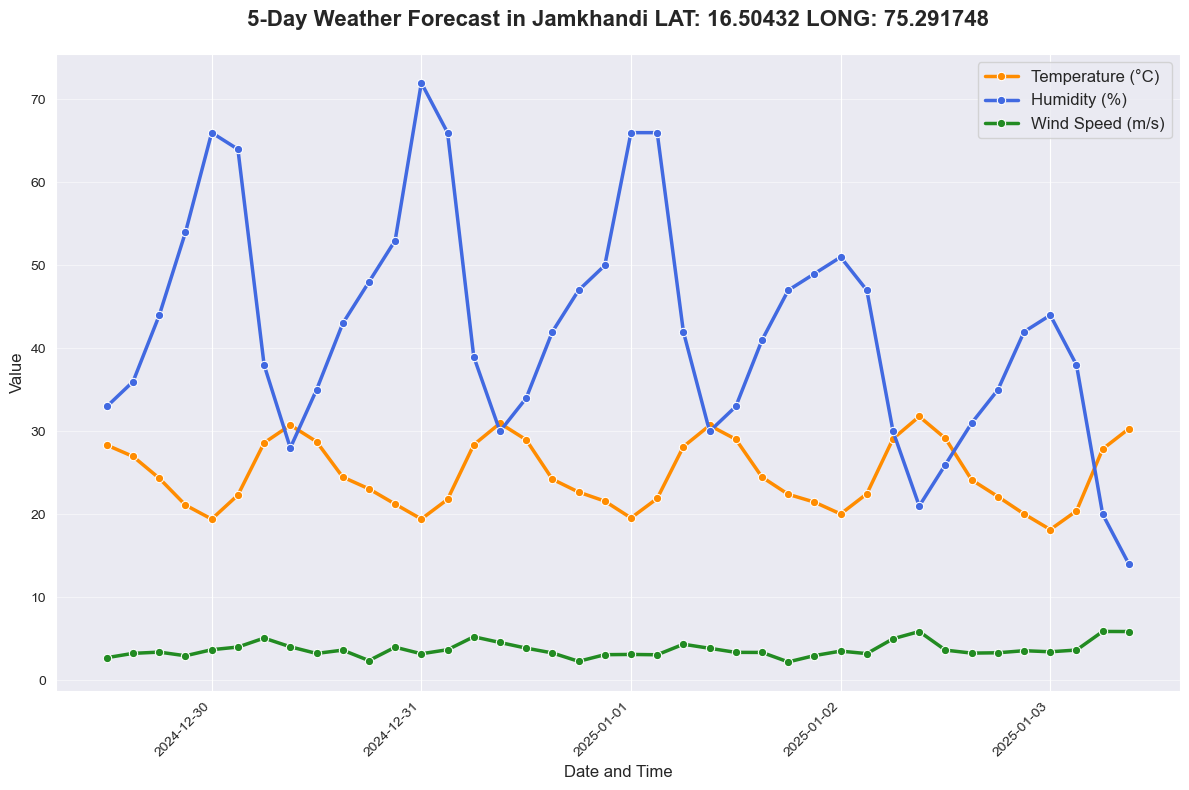

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import io

W_BASE_URL = 'https://api.openweathermap.org/data/2.5/forecast'
W_API_KEY = '*********************'
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 587

# Input 
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))
recipient_email = input("Enter recipient email: ")
sender_email = 'learnatozaboutdata@gmail.com'
sender_password = 'hidr konl tmaa rkec'

def get_weather_data(lat, lon):
    params = {
        'lat': lat,
        'lon': lon,
        'appid': W_API_KEY,
        'units': 'metric'
    }
    response = requests.get(W_BASE_URL, params=params)
    response.raise_for_status()
    return response.json()

def load_weather_data(data):
    df = pd.DataFrame([
        {
            'date': entry['dt_txt'],
            'temperature': entry['main']['temp'],
            'humidity': entry['main']['humidity'],
            'wind_speed': entry['wind']['speed']
        } for entry in data['list']
    ])
    df['date'] = pd.to_datetime(df['date'])
    return df

# Function to plot weather data
def plot_weather_data(df):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='date', y='temperature', data=df, label='Temperature (°C)', color='darkorange', linewidth=2.5, marker='o', markersize=6)
    sns.lineplot(x='date', y='humidity', data=df, label='Humidity (%)', color='royalblue', linewidth=2.5, marker='o', markersize=6)
    sns.lineplot(x='date', y='wind_speed', data=df, label='Wind Speed (m/s)', color='forestgreen', linewidth=2.5, marker='o', markersize=6)

    plt.title(f'5-Day Weather Forecast in Jamkhandi LAT: {latitude} LONG: {longitude}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date and Time', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()

    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    return buffer

# Function to send an email
def send_email(sender_email, sender_password, recipient_email, subject, body, attachment=None):
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'html'))

    if attachment:
        img = MIMEText(attachment.read(), 'base64', 'utf-8')
        img.add_header('Content-Disposition', 'attachment', filename='weather_plot.png')
        img.add_header('Content-ID', '<weather_plot>')
        img.add_header('Content-Type', 'image/png; name="weather_plot.png"')
        msg.attach(img)

    try:
        with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
            server.starttls()
            server.login(sender_email, sender_password)
            server.send_message(msg)
        print(f"Email sent successfully to {recipient_email} with attachment!")
    except smtplib.SMTPAuthenticationError as e:
        print(f"Failed to send email: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

try:
    weather_data = get_weather_data(latitude, longitude)
    df = load_weather_data(weather_data)

    plot_buffer = plot_weather_data(df)

    email_body = f"""<h1>Weather Forecast</h1>
    <p>Find attached the 5-day weather forecast plot for Jamkhandi location (LAT: {latitude}, LONG: {longitude}).</p>"""

    send_email(
        sender_email=sender_email,
        sender_password=sender_password,
        recipient_email=recipient_email,
        subject='5-Day Weather Forecast',
        body=email_body,
        attachment=plot_buffer
    )

except Exception as e:
    print(f"An error occurred: {e}")
